# Содержание
## 1 - Описание проекта GPN Cup - 2023
    1.1 Цели и задачи проекта
    1.2 Описание данных
    1.3 План работы
## 2 - Загрузка, обзор и подготовка данных 
    2.1 Загрузка данных
    2.2 Таблица transaction_df
        2.2.1 Обзор данных таблицы transaction_df
        2.2.3 Заполнение пропусков transaction_df
        2.2.4 Ратчет инфляции в городах
        2.2.5 Визуализация прошлых цен на товары
    2.3 Таблица weather_df
        2.3.1 Обзор данных таблицы weather_df
        2.3.2 Подготовка данных для построения модели
    2.4 Таблица df_competitors
        2.4.1 Обзор данных таблицы df_competitors
        2.4.2 Подготовка данных для построения модели
        2.4.2 Визуализация зависимостей таблицы df_competitors
## 3 - Построение моделей
    3.1 Построение модели для предсказания погоды
        3.1.1 Поиск гиперпараметров модели
        3.2.2 Обучение и тестирование модели
    3.2 Построение модели для предсказания цены
        3.2.1 Поиск модели для предсказаний цены
        3.2.2 Обучение и тестирование модели для предсказаний цены
    3.3 Построение модели для предсказания количества
        3.2.1 Поиск модели для предсказаний количества
        3.2.2 Обучение и тестирование модели для предсказаний количества
## 4 - Применение моделей
    4.1 Создание датасета
    4.2 Предсказания цены и количетсва 
    4.3 Перерасчет цены с учетом задания
    4.4 Построение графиков предсказанной цены
## 5 -  Построение  и применение моделей для конкурентов
    5.1 Построение модели для предсказания цены
        5.1.1 Поиск модели для предсказаний цены
        5.1.2 Обучение и тестирование модели для предсказаний цены
    5.2 Предсказание цены конкурентов
        5.2.1 Предсказание цены для Арториас&Co
        5.2.2 Предсказание цены для Длань господня
        5.2.3 Предсказание цены для ЛилIT
        5.2.4 Предсказание цены для Светлые Души
## 6 - Перерасчет цены с учетом конкурентной
## 7 - Построение модели для себестоимости
    7.1 Подготовка данных df_cost
    7.2 Поиск модели для предсказаний цены
    7.3 Обучение и тестирование модели для предсказаний цены
    7.4 Предсказание себестоимости производства
        7.4.1 Подготовка датасета
        7.4.2 Применение модели для предсказания
## 8 - Расчет чистой прибыли
## 9 - Расчет приыли по сравнению с постоянной ценой
## 10 - Выводы
    


        
   
        
        
    


## 1 - Описание проекта GPN Cup - 2023
###  1.1 Цели и задачи проекта
У вас имеется 5 филиалов в различных городах:
1) Фалькония
2) Анор Лондо
3) Врата Балдура
4) Нокрон
5) Кеджистан

Вам необходимо решить какую цену необходимо установить на каждый из ваших товаров в каждом из городов каждый день!

Но все не так просто: Фракция Астрального Святилища предписывает всем продавцам целебных снадобий согласовывать цену на 90 дней вперед. Кроме того, их правила гласят:
1) одна цена на товар должна держаться больше, чем 3 дня (то есть нельзя установить цену на один день, а на следующий день ее сменить).
2) запрещается изменение цены больше, чем на 1 золотой за раз (то есть нельзя резко изменить цену с 3 золотых на 4,50 золотых, но можно с 3 золотых на 4 золотых, а затем через 3 дня поднять до 4,5 золотых)
3) не искушайтесь поставить слишком высокую цену — все откажутся у вас покупать, а если Древние Боги заметят, что ваша цена на 20% выше, чем у конкурентов, они могут наказать вас за вашу алчность (большим штрафом)

Таков суровый закон Древних Богов и за его нарушение Вас ждет суровое наказание (и большой штраф).
Ваша задача — составить такое расписание цен, чтобы получить максимальную прибыль за следующие 90 дней.

### 1.2 Описание данных
1. Данные о транзакциях.

От предыдущего управляющего вам достались тщательные записи о продажах. Но не
такие тщательные, как Вам бы того хотелось. В них могут встречаться различные
аномалии и ошибки.

product — название продукта (эстус, эльфийская пыльца, целебные травы)\
price — цена одной унции продукта в золотых. Одна золотая делится на 100 серебряных,
поэтому цена указывается до сотых\
amount — объем проданного товара в унциях\
place — город продажи (один из пяти, описанных выше)\
datetime — дата и время продажи

2. Данные о ценах конкурентов.

Благодаря широкой сети информаторов, Вам удалось собрать сведения о ценах на товары,
схожие с вашими, у конкурентов. Данные это не полные, имеют пропуски и ошибки. Но в
целом, по ним можно постараться восстановить картину и понять, как цены конкурентов
влияют на ваши продажи.

date — дата наблюдения за ценой конкурента\
product — название продукта\
competitor — название лавки конкурента\
place — город, в котором была замечена данная цена\
price — цена продукта у конкурента

3. Данные о погоде

Очевидно, что на продажи влияют и внешние факторы, такие как погода, поэтому Вы
решили собрать информацию об этом.

date — дата наблюдения\
place — место наблюдения\
rain — был ли дождь в это время в этом месте\
hot — была ли непереносимая жара в это время в этом месте\
snow — был ли снег в это время в этом месте

4. Данные о себестоимости.

Для того чтобы рассчитать прибыль, необходимо знать, сколько было затрачено на
производство того или иного товара. Отметим, что цена на производство меняется от
времени и места производства товара.

date — дата наблюдения\
place — место наблюдения\
product — продукт\
cost — затраты на производство одной унции продукта

## 1.3 - План работы

+ Загрузить и изучить данные.
+ Провести предобработку данных.
+ Проанализировать данные.
+ Последовательно реализовать задачу регрессии по предсказанию погоды и цены.
+ Реализовать задачу регрессии предсказанию цены конкурентов
+ Реализовать задачу регрессии предсказанию себестоимости товаров
+ Посчитать чистую прбыль, сравнить получившиеся данные о цене с единой

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
import time
import pickle
import joblib
import statistics
import random

## 2.1 Загрузка данных
2.2 Таблица transaction_df

In [2]:
transaction_df = pd.read_parquet("transaction_df.parquet")
df_cost = pd.read_parquet("df_cost.parquet")
df_competitors = pd.read_parquet("df_competitors.parquet")
weather_df = pd.read_parquet("weather_df.parquet")
df_baseline = pd.read_parquet("df_baseline.parquet")
transaction_df.head(10)

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
5,Целебные травы,-7154.53,1.988265,Анор Лондо,2216-01-02 13:57:00
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02 11:54:00
7,Целебные травы,3.90,1.208150,Анор Лондо,2216-01-02 06:53:00
8,Целебные травы,3.90,1.826042,Анор Лондо,2216-01-02 12:05:00
9,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00


2.2.1 Обзор данных таблицы transaction_df

In [3]:
# Выведем общую информацию о таблице
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  875036 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 33.4+ MB


In [4]:
# Выведем названия столбцов таблицы
transaction_df.columns

Index(['product', 'price', 'amount', 'place', 'datetime'], dtype='object')

In [5]:
# Выведем уникальные значения в столбцах
for col in transaction_df:
    print(f'Уникальные значения в столобце {col} : {transaction_df[col].unique()}')

Уникальные значения в столобце product : ['Целебные травы' 'Эльфийская пыльца' 'Эстус']
Уникальные значения в столобце price : [ 3.90000e+00 -7.15453e+03 -8.87090e+03 ... -1.95321e+03 -5.82479e+03
 -5.38292e+03]
Уникальные значения в столобце amount : [ 1.24212514 -0.07968856  0.88245011 ...  1.73849158  0.43034
  0.09024764]
Уникальные значения в столобце place : ['Анор Лондо' None 'Врата Балдура' 'Кеджистан' 'Нокрон' 'Фалькония']
Уникальные значения в столобце datetime : ['2216-01-02T16:28:00.000000000' '2216-01-02T16:21:00.000000000'
 '2216-01-02T03:03:00.000000000' ... '2218-09-27T06:16:00.000000000'
 '2218-09-27T11:14:00.000000000' '2218-09-27T17:50:00.000000000']


In [6]:
# Посчитаем уникальные значения в столбцах
for col in transaction_df:
    print(f'Количесво уникальных значений в столобце {col} : {transaction_df[col].nunique()}')

Количесво уникальных значений в столобце product : 3
Количесво уникальных значений в столобце price : 53926
Количесво уникальных значений в столобце amount : 875036
Количесво уникальных значений в столобце place : 5
Количесво уникальных значений в столобце datetime : 652717


In [7]:
# Посчитаем количество отрицательных цен и пропусков в таблице
a = 0
for i in range(len(transaction_df)):
    if transaction_df.iloc[i]['price'] < 0:
        a += 1
print('Количество отрицательныйх цен:', a)
print('Количество пропущенных значений:', transaction_df.isna().sum(), sep = '\n')

Количество отрицательныйх цен: 54321
Количество пропущенных значений:
product       0
price         0
amount        0
place       432
datetime      0
dtype: int64


## 2.2.3 Заполнение пропусков transaction_df

In [8]:
# Создадим столбцы год, месяц, день для передачи их в модель машинного обучения
transaction_df['Year'] = transaction_df['datetime'].dt.year
transaction_df['Month'] = transaction_df['datetime'].dt.month
transaction_df['Day'] = transaction_df['datetime'].dt.day
transaction_df['datetime'] = transaction_df['datetime'].dt.date

Функция для быстрого перебора строк и заполения пропусков.
Функция заполняет пропуски по принципу сравнеия либо с предыдущей строкой, либо со следующей по дате, продукту, цене и месту. Так как в датасете имеются пропуски подряд, то данную функцию необходимо выполнить дважды. 

In [9]:
length = len(transaction_df) - 2
def correct_mistakes(preline_product, line_product, postline_product, 
                     preline_datetime, line_datetime, postline_datetime,
                    preline_price, line_price, postline_price,
                    preline_place, line_place, postline_place):
    if line_price < 0:
        cond_3 = preline_datetime == postline_datetime and preline_product == postline_product
        cond_4 = preline_datetime == line_datetime and preline_product == line_product and line_place == preline_place
        cond_5 = postline_datetime == line_datetime and postline_product == line_product and line_place == postline_place
        if cond_3:
            line_price = preline_price
        elif cond_4:
            line_price = preline_price
        elif cond_5:
            line_price = postline_price
        else:
            line_price = 0
            
    if line_place is None :
        cond_1 = line_product == preline_product and preline_price == line_price
        cond_2 = line_product == postline_product and postline_price == line_price
        if cond_1:
            line_place = preline_place
        elif cond_2:
            line_place = postline_place
        else:
            line_place = 'unknown_place'
            
    return line_place, line_price

for i in range(2):
    preline_product = transaction_df[:-2]['product']
    line_product = transaction_df[1:-1]['product']
    postline_product = transaction_df[2:]['product']

    preline_datetime = transaction_df[:-2]['datetime']
    line_datetime = transaction_df[1:-1]['datetime']
    postline_datetime = transaction_df[2:]['datetime']

    preline_price = transaction_df[:-2]['price']
    line_price = transaction_df[1:-1]['price']
    postline_price = transaction_df[2:]['price']

    preline_place = transaction_df[:-2]['place']
    line_place = transaction_df[1:-1]['place']
    postline_place = transaction_df[2:]['place']

    place, price = np.vectorize(correct_mistakes)(preline_product, line_product, postline_product, 
                                                        preline_datetime, line_datetime, postline_datetime,
                                                        preline_price, line_price, postline_price,
                                                        preline_place, line_place, postline_place)

    transaction_df.loc[1:length, 'price'] = price
    transaction_df.loc[1:length, 'place'] = place

In [10]:
# Анализ проделанной функции работы, вывод результатов.
a = 0
b = 1
lines_to_drop = []
for i in range(len(transaction_df)):
    if transaction_df.iloc[i]['price'] <= 0:
        lines_to_drop.append(i)
        a += 1
    if transaction_df.iloc[i]['place'] == 'None':
        lines_to_drop.append(i)
        b += 1
    if transaction_df.iloc[i]['place'] == 'unknown_place':
        lines_to_drop.append(i)
        b += 1
        
print('Количество пропущенных цен:', a)
print('Количество пропущенных городов:', b)

transaction_df.drop(lines_to_drop, inplace = True)
transaction_df.reset_index(inplace = True, drop = True)

Количество пропущенных цен: 326
Количество пропущенных городов: 9


Как можно увидеть, число пропущенных городов и цен значительно снизилось, c 55000 до 335

In [11]:
# Сгруппируем датасет и просуммируем количесвто проданного товара в день
transaction_df = transaction_df.groupby(['product', 'price', 'place', 'datetime', 'Year','Month', 'Day'])['amount'].sum().reset_index()

In [12]:
# Отсортируем значения
transaction_df = transaction_df.sort_values(['datetime'])

## 2.2.4 Ратчет инфляции в городах

Расчет инфляции в городах производится как средняя ежемесячная инфляция в каждом городе. 

In [13]:
res = pd.date_range(start='1/2/2216', end='9/27/2218', periods = 33)
dates = [dt.date() for dt in res]

inflation = []

for i in range(len(dates) - 1):
    cond1 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Нокрон') & (transaction_df['datetime'] == dates[i])
    a = transaction_df[cond1]['price']
    a = a.iloc[0]
    cond2 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Нокрон') & (transaction_df['datetime'] == dates[i + 1])
    b = transaction_df[cond2]['price']
    b = b.iloc[0]
    inflation.append((b * 100 / a) - 100)
    inf_norkon = statistics.mean(inflation)

inflation = []
for i in range(len(dates) - 1):
    cond1 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Фалькония') & (transaction_df['datetime'] == dates[i])
    a = transaction_df[cond1]['price']
    a = a.iloc[0]
    cond2 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Фалькония') & (transaction_df['datetime'] == dates[i + 1])
    b = transaction_df[cond2]['price']
    b = b.iloc[0]
    inflation.append((b * 100 / a) - 100)
    inf_falconia = statistics.mean(inflation)

inflation = []
for i in range(len(dates) - 1):
    cond1 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Кеджистан') & (transaction_df['datetime'] == dates[i])
    a = transaction_df[cond1]['price']
    a = a.iloc[0]
    cond2 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Кеджистан') & (transaction_df['datetime'] == dates[i + 1])
    b = transaction_df[cond2]['price']
    b = b.iloc[0]
    inflation.append((b * 100 / a) - 100)
    inf_kegistan = statistics.mean(inflation)

inflation = []
for i in range(len(dates) - 1):
    cond1 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Врата Балдура') & (transaction_df['datetime'] == dates[i])
    a = transaction_df[cond1]['price']
    a = a.iloc[0]
    cond2 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Врата Балдура') & (transaction_df['datetime'] == dates[i + 1])
    b = transaction_df[cond2]['price']
    b = b.iloc[0]
    inflation.append((b * 100 / a) - 100)
    inf_vrata = statistics.mean(inflation)

inflation = []
for i in range(len(dates) - 1):
    cond1 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Анор Лондо') & (transaction_df['datetime'] == dates[i])
    a = transaction_df[cond1]['price']
    a = a.iloc[0]
    cond2 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Анор Лондо') & (transaction_df['datetime'] == dates[i + 1])
    b = transaction_df[cond2]['price']
    b = b.iloc[0]
    inflation.append((b * 100 / a) - 100)
    inf_anor = statistics.mean(inflation)
    
print('Инфляиця в месяц в Норконе:', inf_norkon)
print('Инфляиця в месяц в Кегитсане:', inf_kegistan)
print('Инфляиця в месяц в Фалькония:', inf_falconia)
print('Инфляиця в месяц во Вратах Балдура:', inf_vrata)
print('Инфляиця в месяц в Анор Лондо:', inf_anor)

Инфляиця в месяц в Норконе: 4.026512552651063
Инфляиця в месяц в Кегитсане: 5.328337885731797
Инфляиця в месяц в Фалькония: 1.766485868828624
Инфляиця в месяц во Вратах Балдура: 2.5489233542955034
Инфляиця в месяц в Анор Лондо: 4.090498440087995


## 2.2.5 Визуализация прошлых цен на товары

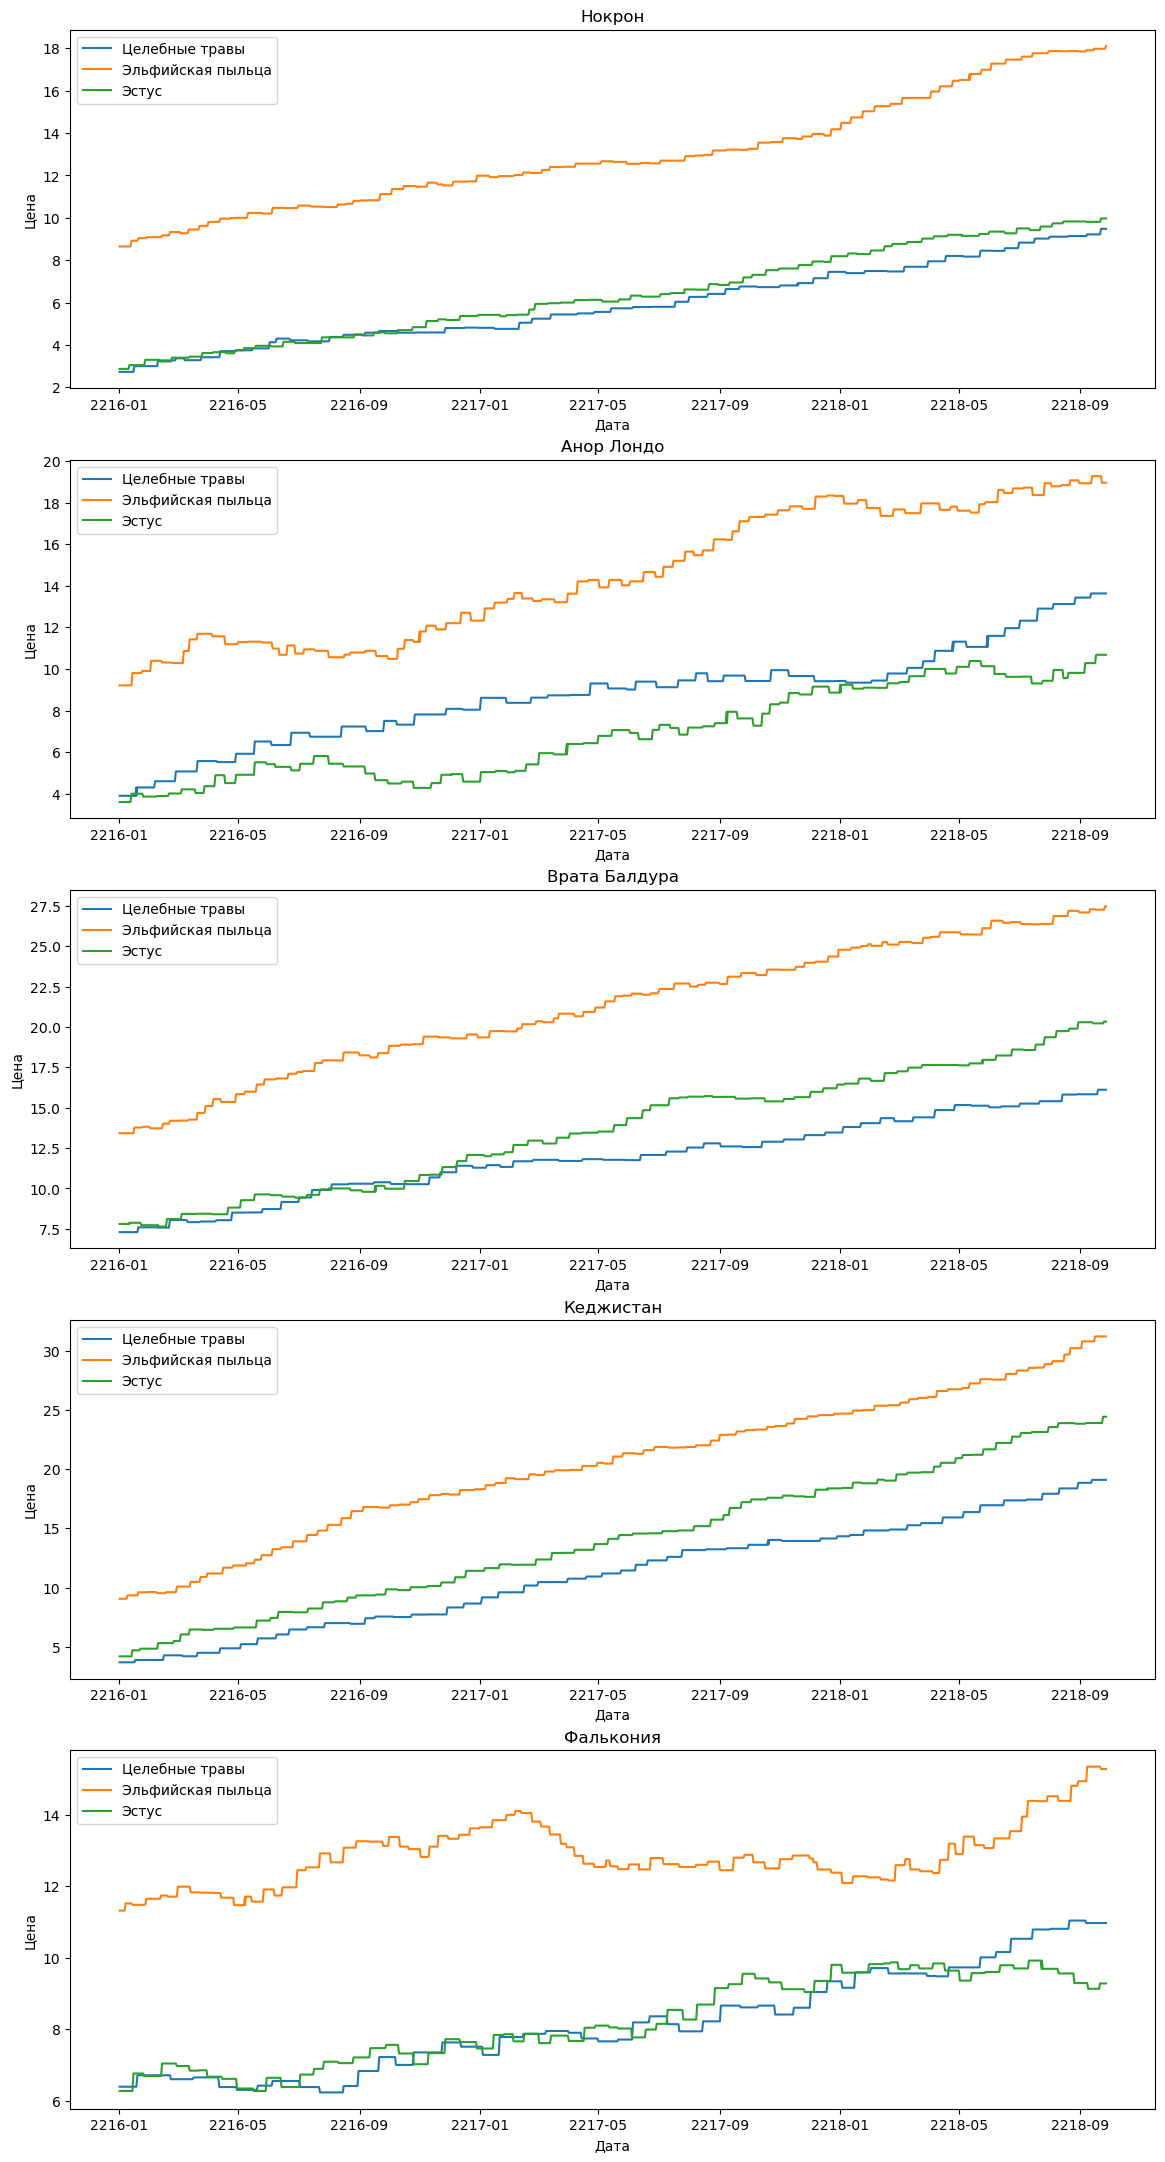

In [14]:
plt.figure(figsize=[14,27])

cond_11 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Нокрон')
cond_12 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Нокрон')
cond_13 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Нокрон')

cond_21 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Анор Лондо')
cond_22 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Анор Лондо')
cond_23 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Анор Лондо')

cond_31 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Врата Балдура')
cond_32 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Врата Балдура')
cond_33 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Врата Балдура')

cond_41 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Кеджистан')
cond_42 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Кеджистан')
cond_43 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Кеджистан')

cond_51 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Фалькония')
cond_52 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Фалькония')
cond_53 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Фалькония')

plt.subplot(511)
plt.plot(transaction_df[cond_11]['datetime'], transaction_df[cond_11]['price'])
plt.subplot(511) 
plt.plot(transaction_df[cond_12]['datetime'], transaction_df[cond_12]['price'])
plt.subplot(511) 
plt.plot(transaction_df[cond_13]['datetime'], transaction_df[cond_13]['price'])
plt.legend(('Целебные травы', 'Эльфийская пыльца', 'Эстус'), loc = 'best')
plt.title("Нокрон")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(512) 
plt.plot(transaction_df[cond_21]['datetime'], transaction_df[cond_21]['price'])
plt.subplot(512) 
plt.plot(transaction_df[cond_22]['datetime'], transaction_df[cond_22]['price'])
plt.subplot(512) 
plt.plot(transaction_df[cond_23]['datetime'], transaction_df[cond_23]['price'])
plt.legend(('Целебные травы', 'Эльфийская пыльца', 'Эстус'), loc = 'best')
plt.title("Анор Лондо")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(513) 
plt.plot(transaction_df[cond_31]['datetime'], transaction_df[cond_31]['price'])
plt.subplot(513) 
plt.plot(transaction_df[cond_32]['datetime'], transaction_df[cond_32]['price'])
plt.subplot(513) 
plt.plot(transaction_df[cond_33]['datetime'], transaction_df[cond_33]['price'])
plt.legend(('Целебные травы', 'Эльфийская пыльца', 'Эстус'), loc = 'best')
plt.title("Врата Балдура")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(514) 
plt.plot(transaction_df[cond_41]['datetime'], transaction_df[cond_41]['price'])
plt.subplot(514) 
plt.plot(transaction_df[cond_42]['datetime'], transaction_df[cond_42]['price'])
plt.subplot(514) 
plt.plot(transaction_df[cond_43]['datetime'], transaction_df[cond_43]['price'])
plt.legend(('Целебные травы', 'Эльфийская пыльца', 'Эстус'), loc = 'best')
plt.title("Кеджистан")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(515) 
plt.plot(transaction_df[cond_51]['datetime'], transaction_df[cond_51]['price'])
plt.subplot(515) 
plt.plot(transaction_df[cond_52]['datetime'], transaction_df[cond_52]['price'])
plt.subplot(515) 
plt.plot(transaction_df[cond_53]['datetime'], transaction_df[cond_53]['price'])
plt.legend(('Целебные травы', 'Эльфийская пыльца', 'Эстус'), loc = 'best')
plt.title("Фалькония")
plt.xlabel("Дата")
plt.ylabel("Цена");

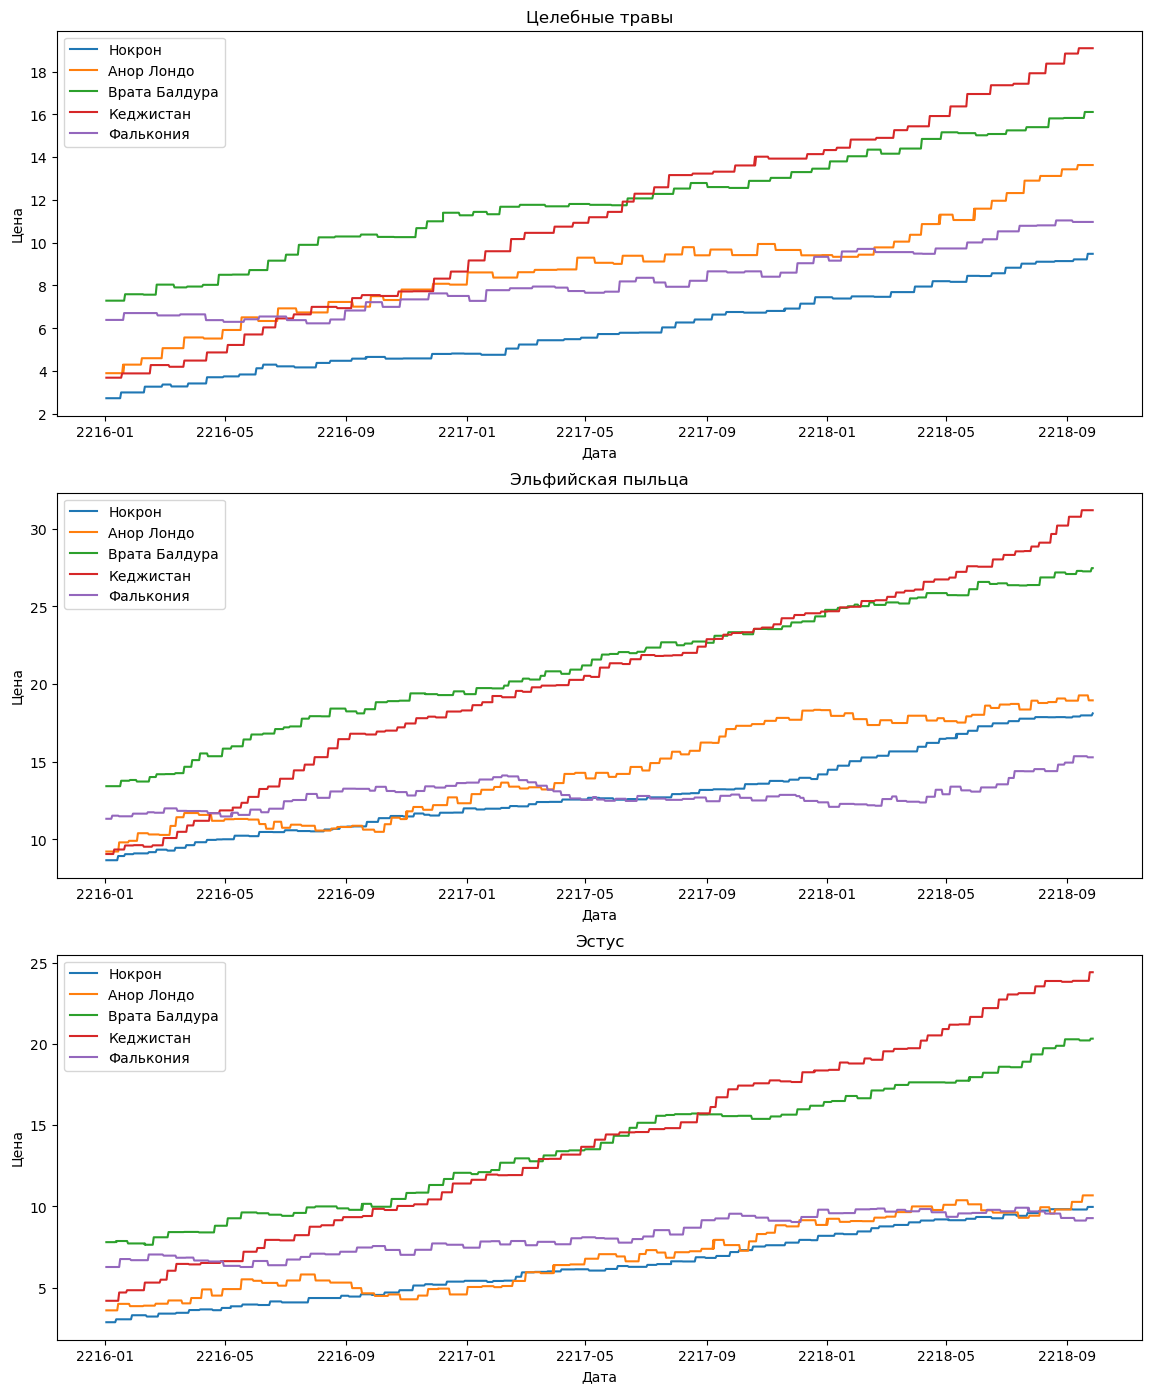

In [15]:
plt.figure(figsize=[14,17])

cond_11 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Нокрон')
cond_12 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Нокрон')
cond_13 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Нокрон')

cond_21 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Анор Лондо')
cond_22 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Анор Лондо')
cond_23 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Анор Лондо')

cond_31 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Врата Балдура')
cond_32 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Врата Балдура')
cond_33 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Врата Балдура')

cond_41 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Кеджистан')
cond_42 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Кеджистан')
cond_43 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Кеджистан')

cond_51 = (transaction_df['product'] == 'Целебные травы') & (transaction_df['place'] == 'Фалькония')
cond_52 = (transaction_df['product'] == 'Эльфийская пыльца') & (transaction_df['place'] == 'Фалькония')
cond_53 = (transaction_df['product'] == 'Эстус') & (transaction_df['place'] == 'Фалькония')

plt.subplot(311)
plt.plot(transaction_df[cond_11]['datetime'], transaction_df[cond_11]['price'])
plt.subplot(311) 
plt.plot(transaction_df[cond_21]['datetime'], transaction_df[cond_21]['price'])
plt.subplot(311) 
plt.plot(transaction_df[cond_31]['datetime'], transaction_df[cond_31]['price'])
plt.subplot(311) 
plt.plot(transaction_df[cond_41]['datetime'], transaction_df[cond_41]['price'])
plt.subplot(311) 
plt.plot(transaction_df[cond_51]['datetime'], transaction_df[cond_51]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Целебные травы")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(312)
plt.plot(transaction_df[cond_12]['datetime'], transaction_df[cond_12]['price'])
plt.subplot(312) 
plt.plot(transaction_df[cond_22]['datetime'], transaction_df[cond_22]['price'])
plt.subplot(312) 
plt.plot(transaction_df[cond_32]['datetime'], transaction_df[cond_32]['price'])
plt.subplot(312) 
plt.plot(transaction_df[cond_42]['datetime'], transaction_df[cond_42]['price'])
plt.subplot(312) 
plt.plot(transaction_df[cond_52]['datetime'], transaction_df[cond_52]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Эльфийская пыльца")
plt.xlabel("Дата")
plt.ylabel("Цена")

plt.subplot(313)
plt.plot(transaction_df[cond_13]['datetime'], transaction_df[cond_13]['price'])
plt.subplot(313) 
plt.plot(transaction_df[cond_23]['datetime'], transaction_df[cond_23]['price'])
plt.subplot(313) 
plt.plot(transaction_df[cond_33]['datetime'], transaction_df[cond_33]['price'])
plt.subplot(313) 
plt.plot(transaction_df[cond_43]['datetime'], transaction_df[cond_43]['price'])
plt.subplot(313) 
plt.plot(transaction_df[cond_53]['datetime'], transaction_df[cond_53]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Эстус")
plt.xlabel("Дата")
plt.ylabel("Цена");

## 2.3 Таблица weather_df
### 2.3.1 Обзор данных таблицы weather_df

In [16]:
# Выведем первые 10 строк таблицы
weather_df.head(10)

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
5,Фалькония,0,0,1,2216-01-03
6,Анор Лондо,1,0,0,2216-01-03
7,Врата Балдура,0,0,1,2216-01-03
8,Нокрон,0,0,1,2216-01-03
9,Кеджистан,0,0,0,2216-01-03


In [17]:
# Выведем общую информацию о таблице
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   place   5000 non-null   object        
 1   hot     5000 non-null   int64         
 2   rain    5000 non-null   int64         
 3   snow    5000 non-null   int64         
 4   date    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 195.4+ KB


In [18]:
# Выведем названия столбцов таблицы
weather_df.columns

Index(['place', 'hot', 'rain', 'snow', 'date'], dtype='object')

In [19]:
# Посмотрим уникальные значения
for col in weather_df:
    print(f'Уникальные значения в столобце {col} : {weather_df[col].unique()}')

Уникальные значения в столобце place : ['Фалькония' 'Анор Лондо' 'Врата Балдура' 'Нокрон' 'Кеджистан']
Уникальные значения в столобце hot : [0 1]
Уникальные значения в столобце rain : [0 1]
Уникальные значения в столобце snow : [0 1]
Уникальные значения в столобце date : ['2216-01-02T00:00:00.000000000' '2216-01-03T00:00:00.000000000'
 '2216-01-04T00:00:00.000000000' '2216-01-05T00:00:00.000000000'
 '2216-01-06T00:00:00.000000000' '2216-01-07T00:00:00.000000000'
 '2216-01-08T00:00:00.000000000' '2216-01-09T00:00:00.000000000'
 '2216-01-10T00:00:00.000000000' '2216-01-11T00:00:00.000000000'
 '2216-01-12T00:00:00.000000000' '2216-01-13T00:00:00.000000000'
 '2216-01-14T00:00:00.000000000' '2216-01-15T00:00:00.000000000'
 '2216-01-16T00:00:00.000000000' '2216-01-17T00:00:00.000000000'
 '2216-01-18T00:00:00.000000000' '2216-01-19T00:00:00.000000000'
 '2216-01-20T00:00:00.000000000' '2216-01-21T00:00:00.000000000'
 '2216-01-22T00:00:00.000000000' '2216-01-23T00:00:00.000000000'
 '2216-01-24T

In [20]:
# Посчитаем уникальные значения
for col in weather_df:
    print(f'Количесво уникальных значений в столобце {col} : {weather_df[col].nunique()}')

Количесво уникальных значений в столобце place : 5
Количесво уникальных значений в столобце hot : 2
Количесво уникальных значений в столобце rain : 2
Количесво уникальных значений в столобце snow : 2
Количесво уникальных значений в столобце date : 1000


In [21]:
# Посчитаем количесвто пропусков
weather_df.isna().sum()

place    0
hot      0
rain     0
snow     0
date     0
dtype: int64

## 2.3.2 Подготовка данных для построения модели

Для обработки данных типа Object мы применяем функцию get_dummies.Она преобразует категориальные переменные в переменные dummy/indicator. 

In [22]:
one_hot = pd.get_dummies(weather_df['place'])
weather_df.drop('place',axis = 1, inplace = True)

weather_df = weather_df.join(one_hot)

Также мы сделаем один столбец с погодой, который будет соответвовать
+ Ничего нет - 0
+ Жарко - 1
+ Дождь - 2
+ Снег - 3

In [23]:
weather_df['weather'] = weather_df.apply(lambda row: 0 if row['hot'] == 0 and row['rain'] == 0 and row['snow'] == 0 else next((col for col in ['hot', 'rain', 'snow'] if row[col] == 1), None), axis=1)
weather_df['weather'] = np.where(weather_df['weather'] == 'hot', 1, weather_df['weather'])
weather_df['weather'] = np.where(weather_df['weather'] == 'rain', 2, weather_df['weather'])
weather_df['weather'] = np.where(weather_df['weather'] == 'snow', 3, weather_df['weather'])

Преобразуем даты как в таблице transaction_df

In [24]:
weather_df['Year'] = weather_df['date'].dt.year
weather_df['Month'] = weather_df['date'].dt.month
weather_df['Day'] = weather_df['date'].dt.day

In [25]:
weather_df.drop(['hot','rain','snow', 'date'], inplace = True, axis = 1)

In [26]:
weather_df['weather'] = weather_df['weather'].astype(int)

### Подготовка данных transaction_df

Для подготовки данных о погоде мы также будем использовать функцию get_dummies

In [27]:
one_hot = pd.get_dummies(transaction_df['place'])
transaction_df = transaction_df.join(one_hot)

one_hot = pd.get_dummies(transaction_df['product'])
transaction_df = transaction_df.join(one_hot)

transaction_df.drop(['product','datetime','place'], inplace = True, axis = 1)
transaction_df = transaction_df.merge(weather_df, on = ['Year','Month', 'Day', 'Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'])

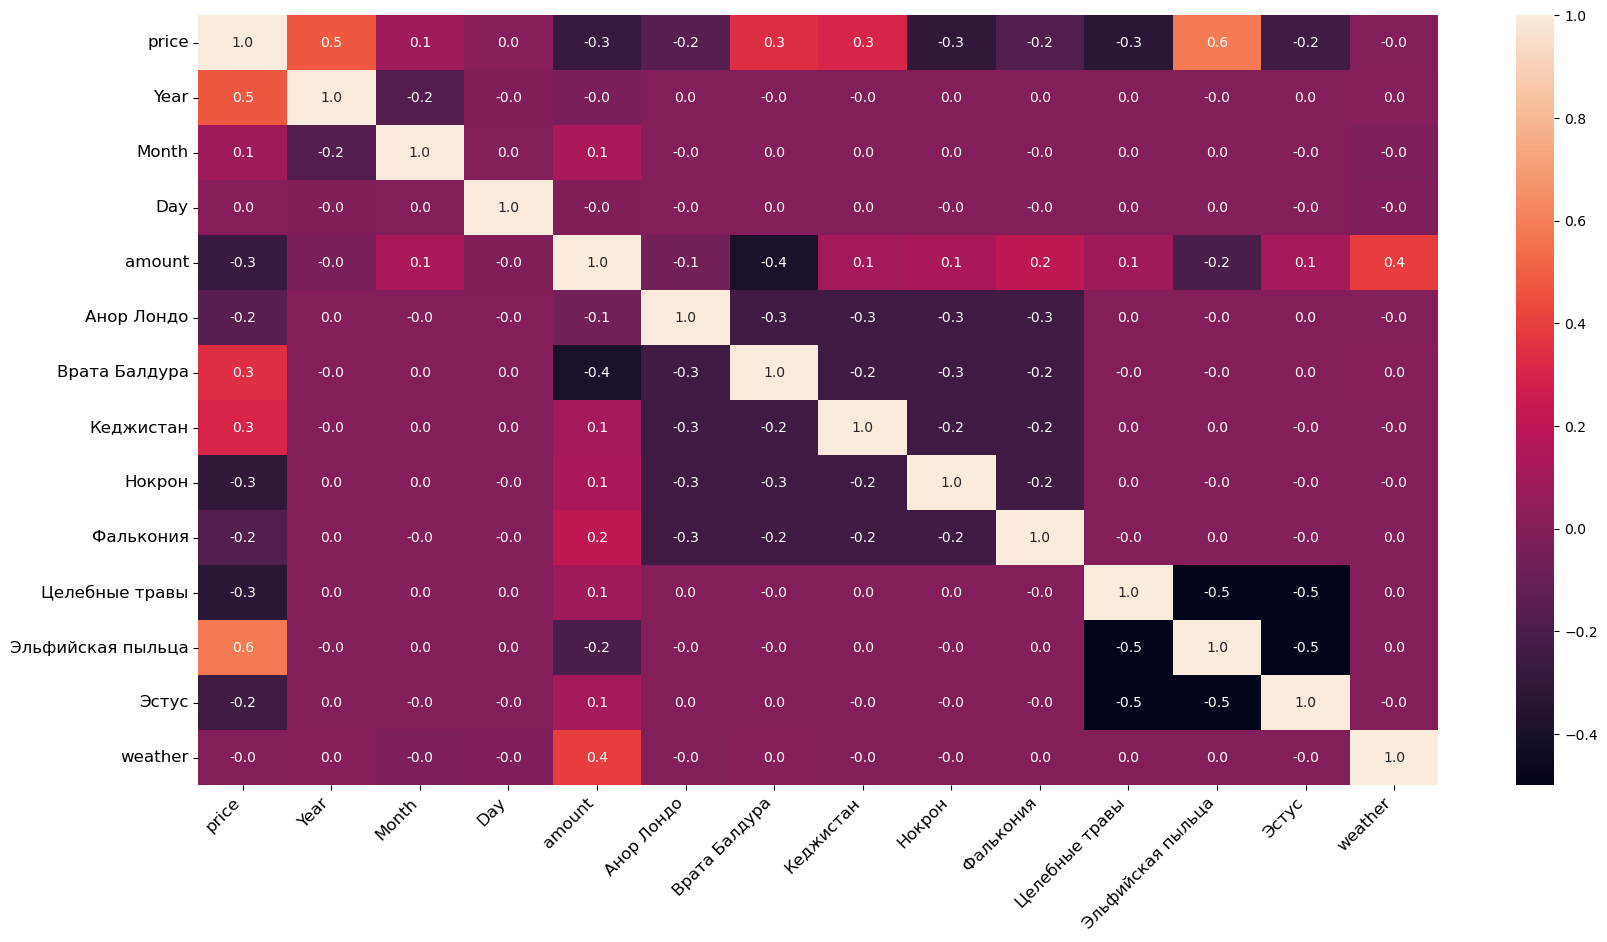

In [28]:
plt.figure(figsize=(20,10))

heatmap = sns.heatmap(transaction_df.corr(), annot=True, fmt=".1f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

В данной таблице можно увидеть, что сильных зависимостей между признаками нет, а значит мы можем оставить все столбцы, без необходимости их удаления. 

## 2.4 Таблица df_competitors
### 2.4.1 Обзор данных таблицы df_competitors

In [29]:
# Выведем первые 10 строк
df_competitors.head(10)

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
6,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-12
7,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-13
9,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-17
10,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-18
12,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-21


In [30]:
# Выведем общую информацию о таблице
df_competitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31799 entries, 0 to 39456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   place       31799 non-null  object        
 1   product     31799 non-null  object        
 2   competitor  31799 non-null  object        
 3   price       31799 non-null  float64       
 4   date        31799 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [31]:
# Выведем названия столбцов таблицы
df_competitors.columns

Index(['place', 'product', 'competitor', 'price', 'date'], dtype='object')

In [32]:
# Выведем уникальные значения таблицы
for col in df_competitors:
    print(f'Уникальные значения в столобце {col} : {df_competitors[col].unique()}')

Уникальные значения в столобце place : ['Анор Лондо' 'Врата Балдура' 'Кеджистан' 'Нокрон' 'Фалькония']
Уникальные значения в столобце product : ['Целебные травы' 'Эльфийская пыльца' 'Эстус']
Уникальные значения в столобце competitor : ['Арториас&Co' 'Длань господня' 'ЛилIT' 'Светлые Души']
Уникальные значения в столобце price : [ 3.78  4.03  3.99 ... 14.93 14.99 15.36]
Уникальные значения в столобце date : ['2216-01-04T00:00:00.000000000' '2216-01-05T00:00:00.000000000'
 '2216-01-06T00:00:00.000000000' '2216-01-09T00:00:00.000000000'
 '2216-01-11T00:00:00.000000000' '2216-01-12T00:00:00.000000000'
 '2216-01-13T00:00:00.000000000' '2216-01-17T00:00:00.000000000'
 '2216-01-18T00:00:00.000000000' '2216-01-21T00:00:00.000000000'
 '2216-01-22T00:00:00.000000000' '2216-01-24T00:00:00.000000000'
 '2216-01-25T00:00:00.000000000' '2216-01-27T00:00:00.000000000'
 '2216-01-30T00:00:00.000000000' '2216-02-01T00:00:00.000000000'
 '2216-02-02T00:00:00.000000000' '2216-02-15T00:00:00.000000000'
 '221

In [33]:
# Посчитаем количество уникальных значений
for col in df_competitors:
    print(f'Количесво уникальных значений в столобце {col} : {df_competitors[col].nunique()}')

Количесво уникальных значений в столобце place : 5
Количесво уникальных значений в столобце product : 3
Количесво уникальных значений в столобце competitor : 4
Количесво уникальных значений в столобце price : 3508
Количесво уникальных значений в столобце date : 1000


In [34]:
# Посчитаем количество отрицательных цен и пропущенных значений =
a = 0
for i in range(len(df_competitors)):
    if df_competitors.iloc[i]['price'] < 0:
        a += 1
print('Количество отрицательныйх цен:', a)
print('Количество пропущенных значений:', df_competitors.isna().sum(), sep = '\n')

Количество отрицательныйх цен: 0
Количество пропущенных значений:
place         0
product       0
competitor    0
price         0
date          0
dtype: int64


## 2.4.2 Подготовка данных для построения модели

Преобразуем даты как в таблице transaction_df

In [35]:
df_competitors['Year'] = df_competitors['date'].dt.year
df_competitors['Month'] = df_competitors['date'].dt.month
df_competitors['Day'] = df_competitors['date'].dt.day
df_competitors['date'] = df_competitors['date'].dt.date

Для подготовки данных о погоде мы также будем использовать функцию get_dummies

In [36]:
one_hot = pd.get_dummies(df_competitors['place'])
df_competitors = df_competitors.join(one_hot)

one_hot = pd.get_dummies(df_competitors['product'])
df_competitors = df_competitors.join(one_hot)

one_hot = pd.get_dummies(df_competitors['competitor'])
df_competitors = df_competitors.join(one_hot)

df_competitors.drop(['product','place', 'date', 'competitor'], inplace = True, axis = 1)
df_competitors = df_competitors.merge(weather_df, on = ['Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'])

## 2.4.2 Визуализация зависимостей таблицы df_competitors

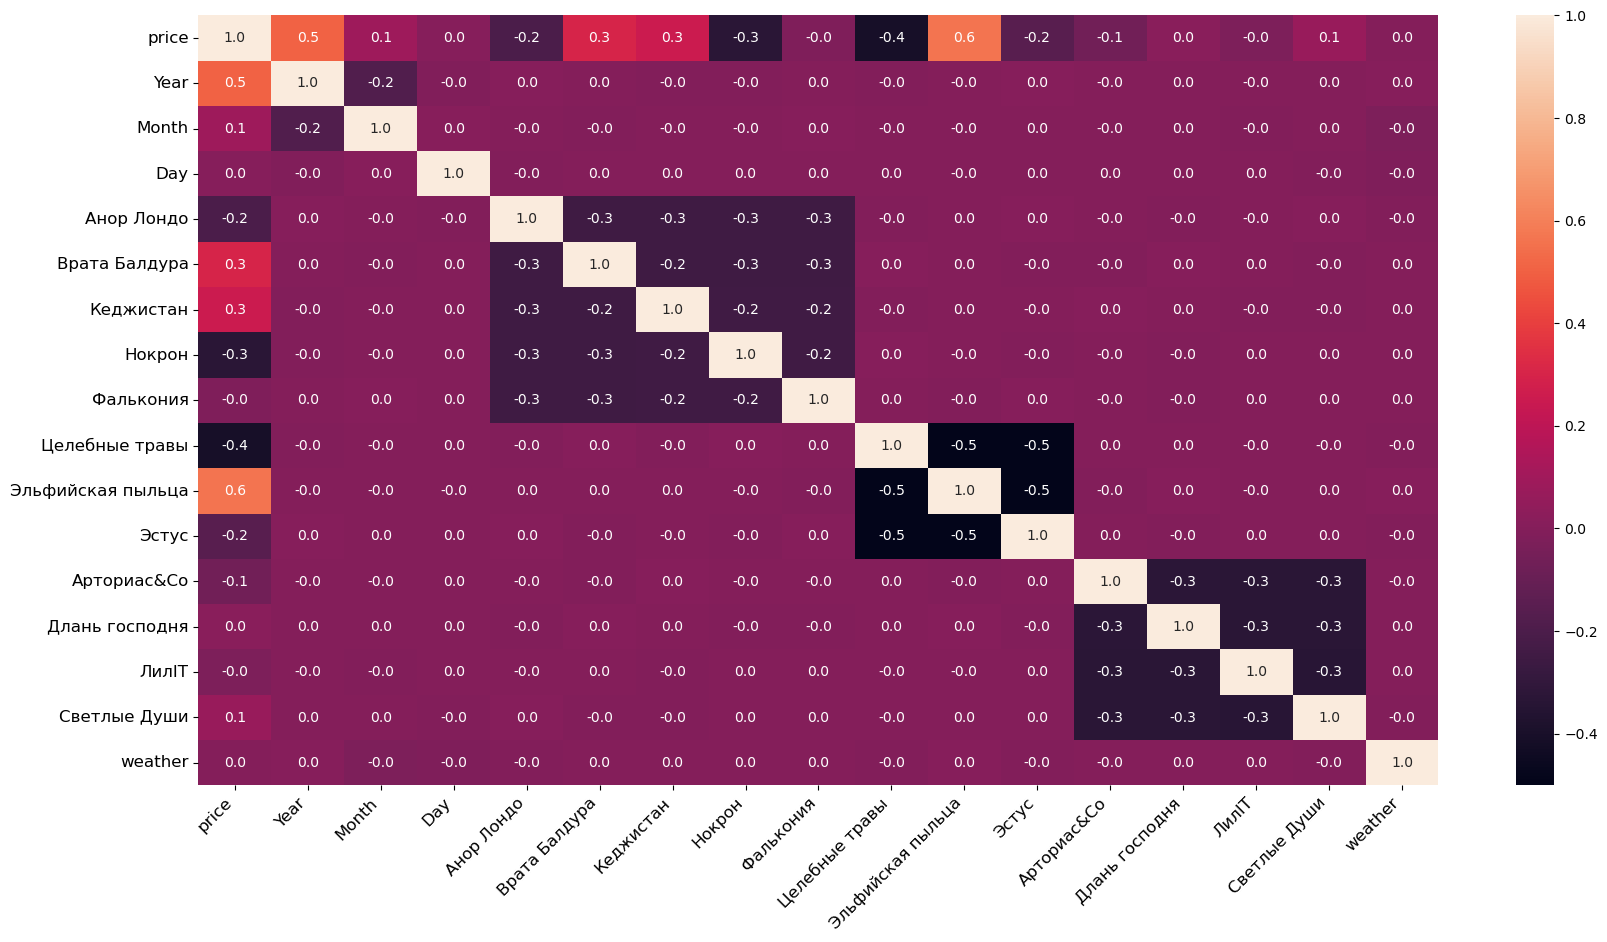

In [37]:
plt.figure(figsize=(20,10))

heatmap = sns.heatmap(df_competitors.corr(), annot=True, fmt=".1f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

В данной таблице можно увидеть, что сильных зависимостей между признаками нет, а значит мы можем оставить все столбцы, без необходимости их удаления.

## Построение моделей
### 3.1 Построение модели для предсказания погоды

In [38]:
# Сформируем обучающую и тестовую выборку
X = weather_df[['Year','Month', 'Day', 'Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония']]
y = weather_df['weather']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=123,stratify=y)

## 3.1.1 Поиск гиперпараметров модели

Для поиска гиперпараметров воспользуемся функцией GridSearch, будем подбирать гиперпараметры для модели RandomForestClassifier и GaussianNB. 

In [39]:
param_grid = { 
    'n_estimators': [50, 100, 215, 200],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
model = RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)

CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}

## 3.2.2 Обучение и тестирование модели

In [40]:
best_model = RandomForestClassifier(random_state=42, n_estimators= 50, max_depth=4, criterion='gini')
best_model.fit(X_train, y_train)

pred = best_model.predict(X_test)
print("Accuracy for Random Forest on weatherdata: ", accuracy_score(y_test, pred))

Accuracy for Random Forest on weatherdata:  0.484


## 3.1.1 Поиск гиперпараметров модели

In [41]:
param_grid = { 
   'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
model = GaussianNB()

CV_rfc = GridSearchCV(estimator = model, param_grid = param_grid)

CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'var_smoothing': 0.01}

## 3.2.2 Обучение и тестирование модели

In [42]:
best_model = GaussianNB(var_smoothing = 0.01)
best_model.fit(X_train, y_train)

pred = best_model.predict(X_test)
print("Accuracy for GaussianNB on weatherdata: ", accuracy_score(y_test, pred))

Accuracy for GaussianNB on weatherdata:  0.484


Так как модели для предсказания погоды показывают плохую точность, было принято решение не прогнозировать новые погодные условия на предстоящие 90 дненй, а взять погоду, которая была в прошлом году. 

## 3.2 Построение модели для предсказания цены

In [43]:
# Формируем обучающую и тестовую выборку
X = transaction_df[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]
y = transaction_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## 3.2.1 Поиск модели для предсказаний цены

In [44]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)  
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.051s
	Explained variance: 0.8363036631431348
	Mean absolute error: 1.7330725216234193
	R2 score: 0.8358506134257297

GradientBoostingRegressor()
	Training time: 0.702s
	Explained variance: 0.9889207416086682
	Mean absolute error: 0.4303030084485393
	R2 score: 0.9889176934085767

KNeighborsRegressor()
	Training time: 0.049s
	Explained variance: 0.8363036631431348
	Mean absolute error: 1.7330725216234193
	R2 score: 0.8358506134257297

ExtraTreesRegressor()
	Training time: 2.327s
	Explained variance: 0.9998549032009862
	Mean absolute error: 0.02857308715902152
	R2 score: 0.9998548252117134

RandomForestRegressor()
	Training time: 2.035s
	Explained variance: 0.9998391848560627
	Mean absolute error: 0.02838732249786507
	R2 score: 0.9998388403613623

DecisionTreeRegressor()
	Training time: 0.028s
	Explained variance: 0.9998031220769449
	Mean absolute error: 0.018015635395875453
	R2 score: 0.9998025691419337

LinearRegression()
	Training time: 0.007s
	E

Как можно увидеть, лучшую объясняемость показала модель ExtraTreesRegressor, ее мы и будем использовать для предсказания цены

## 3.2.2 Обучение и тестирование модели для предсказаний цены

In [45]:
# Обучаем лучшую модель поиска
model_for_price = ExtraTreesRegressor()

model_for_price.fit(X_test, y_test)
y_pred = model_for_price.predict(X_test)  
print(model_for_price)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

ExtraTreesRegressor()
	Explained variance: 0.999999934689421
	Mean absolute error: 3.898868930212464e-05
	R2 score: 0.999999934689421


In [46]:
# Сохраняем модель
filename = 'finalized_model_for_price.sav'
pickle.dump(model_for_price, open(filename, 'wb'))

## 3.3 Построение модели для предсказания количества

In [47]:
# Созадем тестовую и обучающую выборку
X = transaction_df[['weather', 'Year','price', 'Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]
y = transaction_df['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## 3.2.1 Поиск модели для предсказаний количества

In [48]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)  
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.032s
	Explained variance: 0.6198455526202792
	Mean absolute error: 4.96343642440001
	R2 score: 0.619775524382353

GradientBoostingRegressor()
	Training time: 0.694s
	Explained variance: 0.7298455605995104
	Mean absolute error: 4.1978581050140065
	R2 score: 0.7297884668211614

KNeighborsRegressor()
	Training time: 0.035s
	Explained variance: 0.6198455526202792
	Mean absolute error: 4.96343642440001
	R2 score: 0.619775524382353

ExtraTreesRegressor()
	Training time: 3.250s
	Explained variance: 0.8220316994071208
	Mean absolute error: 3.159752779586
	R2 score: 0.8220283827188293

RandomForestRegressor()
	Training time: 4.854s
	Explained variance: 0.8482288341198918
	Mean absolute error: 2.9840079821116205
	R2 score: 0.8482283958249908

DecisionTreeRegressor()
	Training time: 0.056s
	Explained variance: 0.745704320520078
	Mean absolute error: 3.6989629130811568
	R2 score: 0.7456981619689342

LinearRegression()
	Training time: 0.000s
	Explained varian

По результатам подбора модели лучшую объясняемость показала GradientBoostingRegressor(), ее мы и будем использовать для предсказания количесва проданного товара

## 3.2.2 Обучение и тестирование модели для предсказаний количества

In [49]:
model_for_amount = RandomForestRegressor()

model_for_amount.fit(X_test, y_test)
y_pred = model_for_amount.predict(X_test)  
print(model_for_amount)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

RandomForestRegressor()
	Explained variance: 0.9705582291868291
	Mean absolute error: 1.3292042844679608
	R2 score: 0.9705504664088676


In [50]:
filename = 'finalized_model_for_amount.sav'
pickle.dump(model_for_amount, open(filename, 'wb'))

## 4 - Применение моделей
### 4.1 Создание датасета

Как было сказано выше, для показателей погоды мы возьмем такой же период из прошлого года, и применим показатели погоды для предсказания цены и колиства проданного товара. Закодируем также место и продукт, как мы это делали на обучающей выборке.

In [51]:
weather_df.loc[((weather_df['Year'] == 2217) & (weather_df['Month'] == 9) & (weather_df['Day'] == 27))]

test_data = weather_df.loc[3175:3624]

test_data.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
test_data.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)
test_data.reset_index(inplace = True, drop = True)
df = pd.DataFrame({'day_num': range(1, 91)})
test_data = test_data.join(df)

test_data = test_data.merge(df_baseline, on = 'day_num')

one_hot = pd.get_dummies(test_data['place'])
test_data = test_data.join(one_hot)

one_hot = pd.get_dummies(test_data['product'])
test_data = test_data.join(one_hot)

test_data['Year'] = test_data['Year'].replace(2217, 2218)

C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\709739483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\709739483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)


## 4.2 Предсказания цены и количетсва 

Создадим датасеты для предсказания цены и количества. После получения предсказаний сформируем датасет с полученными значениями, удалим колонки, необходимые для обучения и отсортируем датсет

In [52]:
X = test_data[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]

predicted_price = model_for_price.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'price': predicted_price})

test_data.drop(['price'], inplace = True, axis = 1)
test_data = test_data.join(df)

X = test_data[['weather', 'Year','price', 'Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]

predicted_amount = model_for_amount.predict(X)
df = pd.DataFrame({'amount': predicted_amount})

test_data = test_data.join(df)

test_data.drop(['weather', 'Year', 'Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус'], inplace = True, axis = 1)
test_data = test_data.sort_values(['place', 'product'])
test_data.reset_index(inplace = True, drop = True)

## 4.3 Перерасчет цены с учетом задания

Для начала мы учтем ещемесячную инфляцию в городах, добавив к ней рандомное число от -1 до 1, что будет являться 1%. Данный подход можно обосновать изменчивостью рынка, растущему или ниспадающему спросу, росту зарплат и тд и тп.  в первом месяце мы не будему учитывать инфляцию, во втором и третьем - будем

In [53]:
def count_inflation(test_data):

    days_to_multiply1 = range(29, 60)
    days_to_multiply2 = range(60, 91)

    for i in range(31):
        cond1 = (test_data['place'] == 'Нокрон') & (test_data['day_num'] == days_to_multiply1[i])
        cond2 = (test_data['place'] == 'Нокрон') & (test_data['day_num'] == days_to_multiply2[i])
        test_data.loc[cond1,'price'] *= (1 + ((inf_norkon + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_norkon + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_norkon + random.uniform(-1, 1)) / 100))

    for i in range(31):
        cond1 = (test_data['place'] == 'Врата Балдура') & (test_data['day_num'] == days_to_multiply1[i])
        cond2 = (test_data['place'] == 'Врата Балдура') & (test_data['day_num'] == days_to_multiply2[i])
        test_data.loc[cond1,'price'] *= (1 + ((inf_vrata + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_vrata + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_vrata + random.uniform(-1, 1)) / 100))

    for i in range(31):
        cond1 = (test_data['place'] == 'Фалькония') & (test_data['day_num'] == days_to_multiply1[i])
        cond2 = (test_data['place'] == 'Фалькония') & (test_data['day_num'] == days_to_multiply2[i])
        test_data.loc[cond1,'price'] *= (1 + ((inf_falconia + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_falconia + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_falconia + random.uniform(-1, 1)) / 100))

    for i in range(31):
        cond1 = (test_data['place'] == 'Кеджистан') & (test_data['day_num'] == days_to_multiply1[i])
        cond2 = (test_data['place'] == 'Кеджистан') & (test_data['day_num'] == days_to_multiply2[i])
        test_data.loc[cond1,'price'] *= (1 + ((inf_kegistan + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_kegistan + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_kegistan + random.uniform(-1, 1)) / 100))

    for i in range(31):
        cond1 = (test_data['place'] == 'Анор Лондо') & (test_data['day_num'] == days_to_multiply1[i])
        cond2 = (test_data['place'] == 'Анор Лондо') & (test_data['day_num'] == days_to_multiply2[i])
        test_data.loc[cond1,'price'] *= (1 + ((inf_anor + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_anor + random.uniform(-1, 1)) / 100))
        test_data.loc[cond2,'price'] *= (1 + ((inf_anor + random.uniform(-1, 1)) / 100))
    
    test_data['price'] = test_data['price'].round(2)
        
    return test_data

test_data = count_inflation(test_data)

Далее, по условию задачи, необходимо сделать так, чтобы цена не могла изменяться в течение трех дней. Мы берем максимальную предсказанную цену в диапазоне трех дней, и применяем ее к остальной паре. Таким образом, мы максимизируем прибыль от продажи товаров.  

In [54]:
def maximize_price(test_data):
    for i in range(0, 1350, 3):
        max_price = max(test_data.loc[i,'price'], test_data.loc[i + 1,'price'], test_data.loc[i + 2,'price'])
        test_data.loc[i,'price'] = max_price
        test_data.loc[i + 1,'price'] = max_price 
        test_data.loc[i + 2,'price'] = max_price
        
    return test_data

test_data = maximize_price(test_data)

Также, в задаче указано, что цена не может изменяться больше, чем на один золотой. Мы накладываем условие на изменение цены, и если она больше чем единица, то прибаляем по максиму единицу, а остаток от изменения цены переносится на последующие три дня. 

In [55]:
def count_difference(test_data):
    cond_11 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Нокрон')
    cond_12 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Нокрон')
    cond_13 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Нокрон')

    cond_21 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Анор Лондо')
    cond_22 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Анор Лондо')
    cond_23 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Анор Лондо')

    cond_31 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Врата Балдура')
    cond_32 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Врата Балдура')
    cond_33 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Врата Балдура')

    cond_41 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Кеджистан')
    cond_42 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Кеджистан')
    cond_43 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Кеджистан')

    cond_51 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Фалькония')
    cond_52 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Фалькония')
    cond_53 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Фалькония')

    cond_list = [cond_11, cond_12, cond_13, cond_21, cond_22, cond_23, cond_31, cond_32, cond_33, cond_41, cond_42, cond_43,cond_51, cond_52, cond_53,]

    for cond in cond_list:
        price = test_data.loc[cond, 'price']
        for i in range(price.index.values[0], price.index.values[86], 3):
            if (test_data.loc[i,'price'] - test_data.loc[i + 3,'price']) < -1:
                test_data.loc[i + 3,'price'] = test_data.loc[i,'price'] + 1
                difference = abs(test_data.loc[i,'price'] - test_data.loc[i + 3,'price']) - 1
                if i + 4 in test_data.index:
                    test_data.loc[i + 4,'price'] = test_data.loc[i + 4,'price'] + difference
                    test_data.loc[i + 5,'price'] = test_data.loc[i + 5,'price'] + difference
                    test_data.loc[i + 6,'price'] = test_data.loc[i + 6,'price'] + difference
            if (test_data.loc[i,'price'] - test_data.loc[i + 3,'price']) > 1:
                test_data.loc[i + 3,'price'] = test_data.loc[i,'price'] - 1
                difference = (test_data.loc[i,'price'] - test_data.loc[i + 3,'price']) - 1
                if i + 4 in test_data.index:
                    test_data.loc[i + 4,'price'] = test_data.loc[i + 4,'price'] - difference
                    test_data.loc[i + 5,'price'] = test_data.loc[i + 5,'price'] - difference
                    test_data.loc[i + 6,'price'] = test_data.loc[i + 6,'price'] - difference
                    
    return test_data

test_data = count_difference(test_data)

## 4.4 Построение графиков предсказанной цены

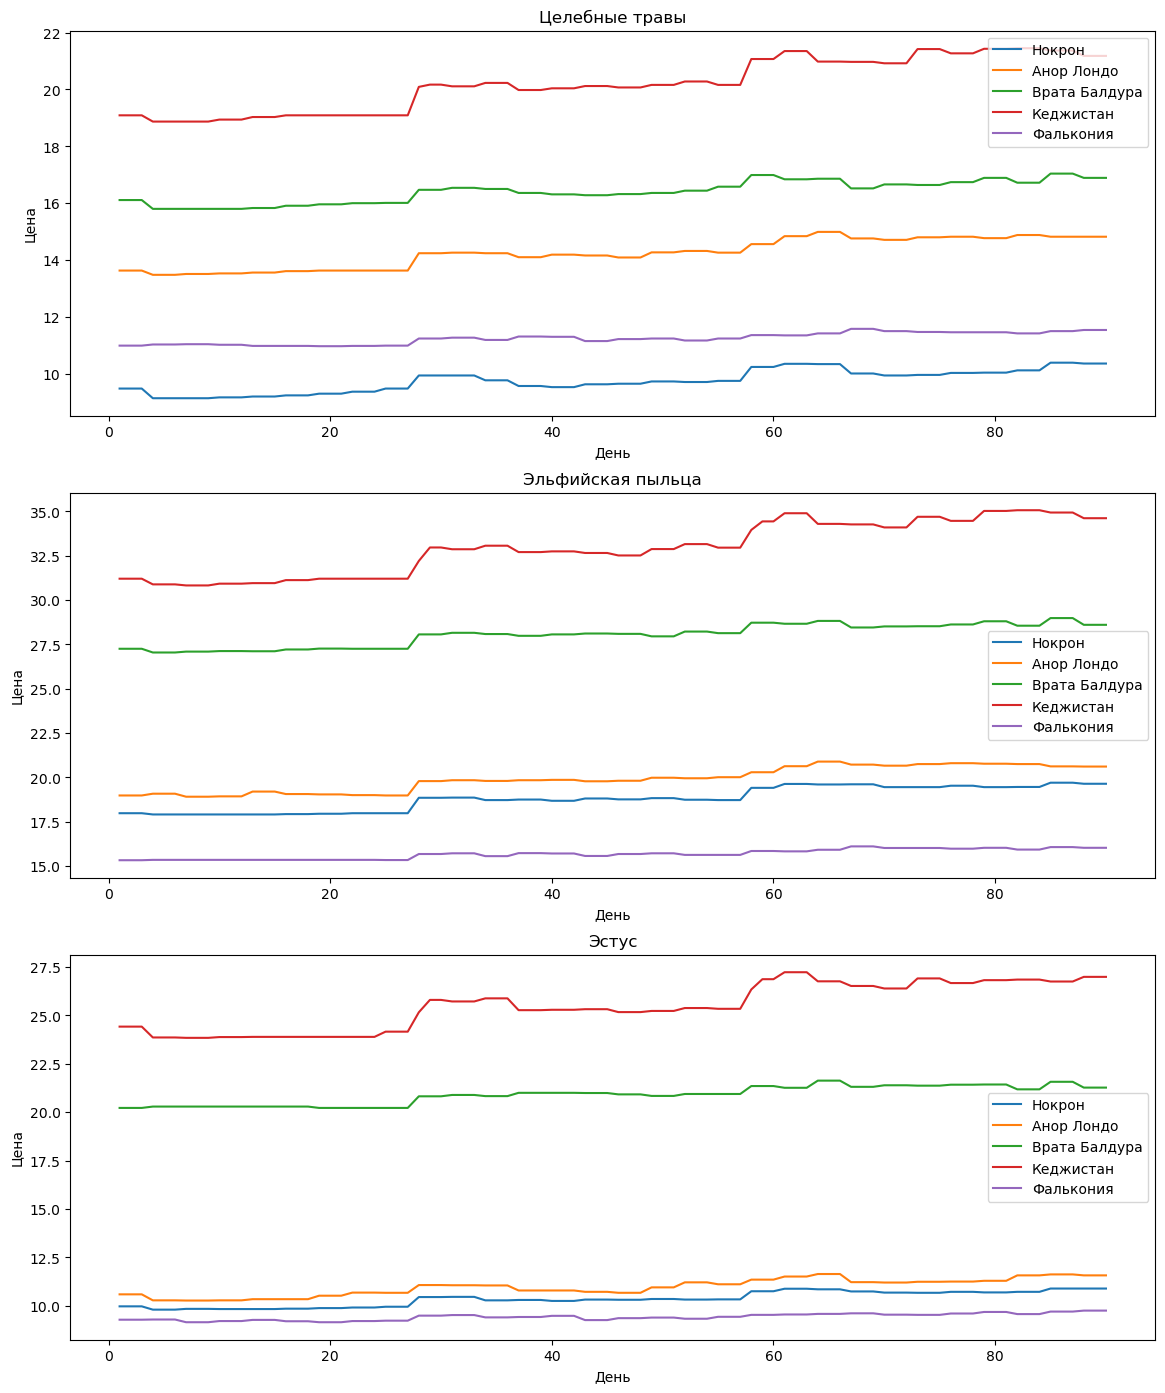

In [56]:
plt.figure(figsize=[14,17])

cond_11 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Нокрон')
cond_12 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Нокрон')
cond_13 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Нокрон')

cond_21 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Анор Лондо')
cond_22 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Анор Лондо')
cond_23 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Анор Лондо')

cond_31 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Врата Балдура')
cond_32 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Врата Балдура')
cond_33 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Врата Балдура')

cond_41 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Кеджистан')
cond_42 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Кеджистан')
cond_43 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Кеджистан')

cond_51 = (test_data['product'] == 'Целебные травы') & (test_data['place'] == 'Фалькония')
cond_52 = (test_data['product'] == 'Эльфийская пыльца') & (test_data['place'] == 'Фалькония')
cond_53 = (test_data['product'] == 'Эстус') & (test_data['place'] == 'Фалькония')

plt.subplot(311)
plt.plot(test_data[cond_11]['day_num'], test_data[cond_11]['price'])
plt.subplot(311) 
plt.plot(test_data[cond_21]['day_num'], test_data[cond_21]['price'])
plt.subplot(311) 
plt.plot(test_data[cond_31]['day_num'], test_data[cond_31]['price'])
plt.subplot(311) 
plt.plot(test_data[cond_41]['day_num'], test_data[cond_41]['price'])
plt.subplot(311) 
plt.plot(test_data[cond_51]['day_num'], test_data[cond_51]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Целебные травы")
plt.xlabel("День")
plt.ylabel("Цена")

plt.subplot(312)
plt.plot(test_data[cond_12]['day_num'], test_data[cond_12]['price'])
plt.subplot(312) 
plt.plot(test_data[cond_22]['day_num'], test_data[cond_22]['price'])
plt.subplot(312) 
plt.plot(test_data[cond_32]['day_num'], test_data[cond_32]['price'])
plt.subplot(312) 
plt.plot(test_data[cond_42]['day_num'], test_data[cond_42]['price'])
plt.subplot(312) 
plt.plot(test_data[cond_52]['day_num'], test_data[cond_52]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Эльфийская пыльца")
plt.xlabel("День")
plt.ylabel("Цена")

plt.subplot(313)
plt.plot(test_data[cond_13]['day_num'], test_data[cond_13]['price'])
plt.subplot(313) 
plt.plot(test_data[cond_23]['day_num'], test_data[cond_23]['price'])
plt.subplot(313) 
plt.plot(test_data[cond_33]['day_num'], test_data[cond_33]['price'])
plt.subplot(313) 
plt.plot(test_data[cond_43]['day_num'], test_data[cond_43]['price'])
plt.subplot(313) 
plt.plot(test_data[cond_53]['day_num'], test_data[cond_53]['price'])
plt.legend(('Нокрон', 'Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Фалькония'), loc = 'best')
plt.title("Эстус")
plt.xlabel("День")
plt.ylabel("Цена");

как это было и на обучающей выборке, на графике можно заметить медленное увеличение цены, резких перепадов нет. Из этого всего можно сделать вывод, что написанные и примененные алгоритмы предсказания цены работают корректно. 

## 5 - Построение и применение моделей для конкурентов
### 5.1 Построение модели для предсказания цены

In [57]:
# Разбиение на тестовую и обучающую выборку
X = df_competitors[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души']]
y = df_competitors['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### 5.1.1 Поиск модели для предсказаний цены

In [58]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)  
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.005s
	Explained variance: 0.8512395635903753
	Mean absolute error: 1.6355440251572329
	R2 score: 0.8512362162473445

GradientBoostingRegressor()
	Training time: 1.410s
	Explained variance: 0.969808940509257
	Mean absolute error: 0.7331311391828227
	R2 score: 0.9698080375626149

KNeighborsRegressor()
	Training time: 0.014s
	Explained variance: 0.8512395635903753
	Mean absolute error: 1.6355440251572329
	R2 score: 0.8512362162473445

ExtraTreesRegressor()
	Training time: 5.083s
	Explained variance: 0.9997437300485106
	Mean absolute error: 0.04590828616352597
	R2 score: 0.9997436984960787

RandomForestRegressor()
	Training time: 6.812s
	Explained variance: 0.9996509049236442
	Mean absolute error: 0.057753081761007005
	R2 score: 0.9996501282327563

DecisionTreeRegressor()
	Training time: 0.076s
	Explained variance: 0.999444923206366
	Mean absolute error: 0.03888836477987436
	R2 score: 0.9994440752356033

LinearRegression()
	Training time: 0.014s
	Exp

лучшая модель - ExtraTreesRegressor, ее и будем применять

## 5.1.2 Обучение и тестирование модели для предсказаний цены

In [59]:
model = ExtraTreesRegressor()

model.fit(X_test, y_test)
y_pred = model.predict(X_test)  
print(model)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

ExtraTreesRegressor()
	Explained variance: 1.0
	Mean absolute error: 1.3940909921918931e-14
	R2 score: 1.0


In [60]:
filename = 'finalized_model_for_competitors_price.sav'
pickle.dump(model, open(filename, 'wb'))

## 5.2 Предсказание цены конкурентов
### 5.2.1 Формировние датасета

In [61]:
weather_df.loc[((weather_df['Year'] == 2217) & (weather_df['Month'] == 9) & (weather_df['Day'] == 27))]

test_data_comp = weather_df.loc[3175:3624]

test_data_comp.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
test_data_comp.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)
test_data_comp.reset_index(inplace = True, drop = True)
df = pd.DataFrame({'day_num': range(1, 91)})
test_data_comp = test_data_comp.join(df)

test_data_comp = test_data_comp.merge(df_baseline, on = 'day_num')

one_hot = pd.get_dummies(test_data_comp['place'])
test_data_comp = test_data_comp.join(one_hot)

one_hot = pd.get_dummies(test_data_comp['product'])
test_data_comp = test_data_comp.join(one_hot)

test_data_comp['Year'] = test_data_comp['Year'].replace(2217, 2218)

C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\3099506030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_comp.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\3099506030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_comp.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)


создадим для каждого конкурента свой датасет и пропустим через нашу модель. Таким образом, мы сможем предсказать цены  всех конкурентов и сделать наилучшее предложение. 

In [62]:
data= {'Арториас&Co': [1]*1350,
        'Длань господня': [0]*1350, 
       'ЛилIT': [0]*1350,
       'Светлые Души': [0]*1350}

df_artorias = pd.DataFrame(data)

data= {'Арториас&Co': [0]*1350,
        'Длань господня': [1]*1350, 
       'ЛилIT': [0]*1350,
       'Светлые Души': [0]*1350}

df_dlan = pd.DataFrame(data)

data= {'Арториас&Co': [0]*1350,
        'Длань господня': [0]*1350, 
       'ЛилIT': [1]*1350,
       'Светлые Души': [0]*1350}

df_lilit = pd.DataFrame(data)

data= {'Арториас&Co': [0]*1350,
        'Длань господня': [0]*1350, 
       'ЛилIT': [0]*1350,
       'Светлые Души': [1]*1350}

df_svetlye = pd.DataFrame(data)

In [63]:
test_data_artorias = test_data_comp.join(df_artorias)
test_data_dlan = test_data_comp.join(df_dlan)
test_data_lilit = test_data_comp.join(df_lilit)
test_data_svetlye = test_data_comp.join(df_svetlye)

## 5.2.1 Предсказание цены для Арториас&Co

In [64]:
X = test_data_artorias[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души']]

predicted_price = model.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'price': predicted_price})

test_data_artorias.drop(['price'], inplace = True, axis = 1)
test_data_artorias = test_data_artorias.join(df)
test_data_artorias.drop(['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души'], inplace = True, axis = 1)
test_data_artorias = test_data_artorias.sort_values(['place', 'product'])
test_data_artorias.reset_index(inplace = True, drop = True)

## 5.2.2 Предсказание цены для Длань господня

In [65]:
X = test_data_dlan[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души']]

predicted_price = model.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'price': predicted_price})

test_data_dlan.drop(['price'], inplace = True, axis = 1)
test_data_dlan = test_data_dlan.join(df)
test_data_dlan.drop(['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души'], inplace = True, axis = 1)
test_data_dlan = test_data_dlan.sort_values(['place', 'product'])
test_data_dlan.reset_index(inplace = True, drop = True)

## 5.2.3 Предсказание цены для Лил IT

In [66]:
X = test_data_lilit[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души']]

predicted_price = model.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'price': predicted_price})

test_data_lilit.drop(['price'], inplace = True, axis = 1)
test_data_lilit = test_data_lilit.join(df)
test_data_lilit.drop(['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души'], inplace = True, axis = 1)
test_data_lilit = test_data_lilit.sort_values(['place', 'product'])
test_data_lilit.reset_index(inplace = True, drop = True)

## 5.2.4 Предсказание цены для Светлые Души

In [67]:
X = test_data_svetlye[['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души']]

predicted_price = model.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'price': predicted_price})

test_data_svetlye.drop(['price'], inplace = True, axis = 1)
test_data_svetlye = test_data_svetlye.join(df)
test_data_svetlye.drop(['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус', 'Арториас&Co','Длань господня','ЛилIT','Светлые Души'], inplace = True, axis = 1)
test_data_svetlye = test_data_svetlye.sort_values(['place', 'product'])
test_data_svetlye.reset_index(inplace = True, drop = True)

## 5.3 Перерасчет цены с учетом инфляции и правил

Так как все компании должны подчинятьсч правилам, которые были указаны в задании, то мы также введем перерасчет цен для всех конкурентов с учетом инфляции. 

In [68]:
# Перерасет для Длань господня
test_data_dlan = count_inflation(test_data_dlan)
test_data_dlan = maximize_price(test_data_dlan)
test_data_dlan = count_difference(test_data_dlan)

test_data_dlan = test_data_dlan.rename(columns={'price': 'price_dlan'})

In [69]:
# Перерасет для Арториас&Co
test_data_artorias = count_inflation(test_data_artorias)
test_data_artorias = maximize_price(test_data_artorias)
test_data_artorias = count_difference(test_data_artorias)

test_data_artorias = test_data_artorias.rename(columns={'price': 'price_astorias'})

In [70]:
# Перерасет для Лил IT
test_data_lilit = count_inflation(test_data_lilit)
test_data_lilit = maximize_price(test_data_lilit)
test_data_lilit = count_difference(test_data_lilit)

test_data_lilit = test_data_lilit.rename(columns={'price': 'price_lilit'})

In [71]:
# Перерасет для Светлые Души
test_data_svetlye = count_inflation(test_data_svetlye)
test_data_svetlye = maximize_price(test_data_svetlye)
test_data_svetlye = count_difference(test_data_svetlye)

test_data_svetlye = test_data_svetlye.rename(columns={'price': 'price_svetlye'})

In [72]:
# cоединим все предсказания в один датасет
test_data = test_data.merge(test_data_dlan, on = ['day_num','place','product'])
test_data = test_data.merge(test_data_artorias, on = ['day_num','place','product'])
test_data = test_data.merge(test_data_lilit, on = ['day_num','place','product'])
test_data = test_data.merge(test_data_svetlye, on = ['day_num','place','product'])

## 6 - Перерасчет предсказанной цены с учетом конкурентной


Для конечного подсчета цены было рещено сделать максималтьно выгодное предложение с учетом цен конкурентов. Итоговая цена на товары будет составляться как среднее между всемми ценами конкурентов. также, для привлечения клиентов, от средней стоимости будет отнят 1%. Таким образом, итоговая цена на товар будет ниже, чем средняя по городу. 

In [73]:
for i in range(0, 1350, 3):
    mean_price = statistics.mean([test_data.loc[i,'price_dlan'], test_data.loc[i,'price_astorias'], test_data.loc[i,'price_lilit'], test_data.loc[i,'price_svetlye']])
    test_data.loc[i, 'price'] = mean_price * 0.99
    test_data.loc[i + 1,'price'] = mean_price * 0.99
    test_data.loc[i + 2,'price'] = mean_price * 0.99

test_data['price'] = test_data['price'].round(2)
test_data.drop(['price_dlan','price_astorias','price_lilit','price_svetlye'], inplace = True, axis = 1)

## 7 - Построение модели для себестоимости
### 7.1 Подготовка данных df_cost

так как себестоимость тоже варьируется, мы будем предсказыать и ее. Данные обрабатываются и кодируюстся по тем же принципам, которые были описаны выше

In [74]:
df_cost['Year'] = df_cost['date'].dt.year
df_cost['Month'] = df_cost['date'].dt.month
df_cost['Day'] = df_cost['date'].dt.day
df_cost['date'] = df_cost['date'].dt.date

In [75]:
one_hot = pd.get_dummies(df_cost['place'])
df_cost = df_cost.join(one_hot)

one_hot = pd.get_dummies(df_cost['product'])
df_cost = df_cost.join(one_hot)

df_cost.drop(['product','place', 'date'], inplace = True, axis = 1)
df_cost = df_cost.merge(weather_df, on = ['Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'])

In [76]:
X = df_cost[['weather', 'Year', 'Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]
y = df_cost['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## 7.3 Обучение и тестирование модели для предсказаний цены

In [77]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)  
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.007s
	Explained variance: 0.2705617706454442
	Mean absolute error: 2.5158303571428573
	R2 score: 0.2642944211377667

GradientBoostingRegressor()
	Training time: 0.103s
	Explained variance: 0.7268598200608845
	Mean absolute error: 1.5381449167398349
	R2 score: 0.7257459865714768

KNeighborsRegressor()
	Training time: 0.007s
	Explained variance: 0.2705617706454442
	Mean absolute error: 2.5158303571428573
	R2 score: 0.2642944211377667

ExtraTreesRegressor()
	Training time: 0.340s
	Explained variance: 0.6408696741801259
	Mean absolute error: 1.6885589285714286
	R2 score: 0.6408438601977113

RandomForestRegressor()
	Training time: 0.410s
	Explained variance: 0.6772373436475938
	Mean absolute error: 1.6359758928571426
	R2 score: 0.6769706481945335

DecisionTreeRegressor()
	Training time: 0.000s
	Explained variance: 0.4584609681669142
	Mean absolute error: 2.038169642857143
	R2 score: 0.45840953575228427

LinearRegression()
	Training time: 0.000s
	Expla

лучшая модель - GradientBoostingRegressor, будем использовать ее

In [78]:
model = GradientBoostingRegressor()

model.fit(X_test, y_test)
y_pred = model.predict(X_test)  
print(model)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

GradientBoostingRegressor()
	Explained variance: 0.902219750706531
	Mean absolute error: 0.9044719108893275
	R2 score: 0.9022197507065309


In [79]:
filename = 'finalized_model_for_real_cost.sav'
pickle.dump(model, open(filename, 'wb'))

## 7.4 Предсказание себестоимости производства
### 7.4.1 Подготовка датасета

Подготавливаем датасет по тем же принципам, которые были изложены выше. 

In [80]:
weather_df.loc[((weather_df['Year'] == 2217) & (weather_df['Month'] == 9) & (weather_df['Day'] == 27))]

test_data_cost = weather_df.loc[3175:3624]

test_data_cost.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
test_data_cost.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)
test_data_cost.reset_index(inplace = True, drop = True)

df = pd.DataFrame({'day_num': range(1, 91)})
test_data_cost = test_data_cost.join(df)

test_data_cost = test_data_cost.merge(df_baseline, on = 'day_num')

one_hot = pd.get_dummies(test_data_cost['place'])
test_data_cost = test_data_cost.join(one_hot)

one_hot = pd.get_dummies(test_data_cost['product'])
test_data_cost = test_data_cost.join(one_hot)

test_data_cost['Year'] = test_data_cost['Year'].replace(2217, 2218)

C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\1250025239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cost.drop_duplicates(['Year', 'Month', 'Day'], inplace = True)
C:\Users\bgre4\AppData\Local\Temp\ipykernel_14316\1250025239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cost.drop(['Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония'], inplace = True, axis = 1)


## 7.4.2 Применение модели для предсказания

Получаем предсказания себестоимости

In [81]:
X = test_data_cost[['weather', 'Year', 'Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус']]

predicted_price = model.predict(X)
predicted_price = predicted_price.round(decimals=2)
df = pd.DataFrame({'cost': predicted_price})

test_data_cost.drop(['price'], inplace = True, axis = 1)
test_data_cost = test_data_cost.join(df)
test_data_cost.drop(['weather', 'Year','Month','Day','Анор Лондо','Врата Балдура','Кеджистан','Нокрон','Фалькония','Целебные травы','Эльфийская пыльца','Эстус'], inplace = True, axis = 1)
test_data_cost = test_data_cost.sort_values(['place', 'product'])
test_data_cost.reset_index(inplace = True, drop = True)
test_data = test_data.merge(test_data_cost, on = ['day_num','place','product'])

## 8 - Расчет чистой прибыли

In [82]:
res = 0 
for i in range(len(test_data)):
    a = test_data.iloc[i]['price'] * test_data.iloc[i]['amount']
    b = test_data.iloc[i]['cost'] * test_data.iloc[i]['amount']
    res += a - b
    
print(f'Прибыль за 90 дней составляет {int(res)} золотых, {int((round(res - int(res), 2) * 100))} серебряных')

Прибыль за 90 дней составляет 500095 золотых, 22 серебряных


## 9 - Расчет приыли по сравнению с постоянной ценой

In [83]:
test_data = test_data.merge(df_baseline, on = ['day_num','place','product'])

In [84]:
res = 0 
for i in range(len(test_data)):
    a = test_data.iloc[i]['price_x'] * test_data.iloc[i]['amount']
    b = test_data.iloc[i]['price_y'] * test_data.iloc[i]['amount']
    res += a - b
    
print(f'Прибыль больше на {int(a)} золотых, {int((round(a - int(a), 2) * 100))} серебряных по сравнению с единой ценой')

Прибыль больше на 750 золотых, 34 серебряных по сравнению с единой ценой


In [85]:
test_data.drop(['cost', 'price_y', 'amount'], inplace = True, axis = 1)
test_data = test_data.rename(columns={'price_x': 'price'})
test_data.to_excel('result.xlsx')

## Выводы

Благодаря проделанной работе нам удалось сделать предсказания цены на предстоящие 90 дней. Удалость сделать предсказания ценовой политики всех 4 конкурентов.\
По итогам работы было предсказано, что чистая прибыль компании за 90 дней составит порядка 500 000 золотых. По сравнению с единой ценой прибыль будет больше на 750 золотых. 